# 다중회귀 - 보스톤 주택 가격

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
from sklearn.datasets import load_boston
boston = load_boston()

In [41]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 산점도와 선형회귀선

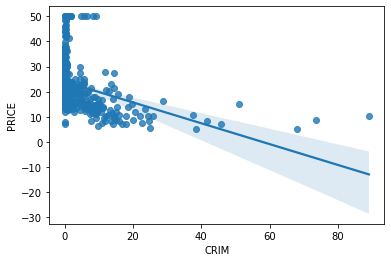

In [42]:
sns.regplot(x='CRIM', y='PRICE',data=df)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

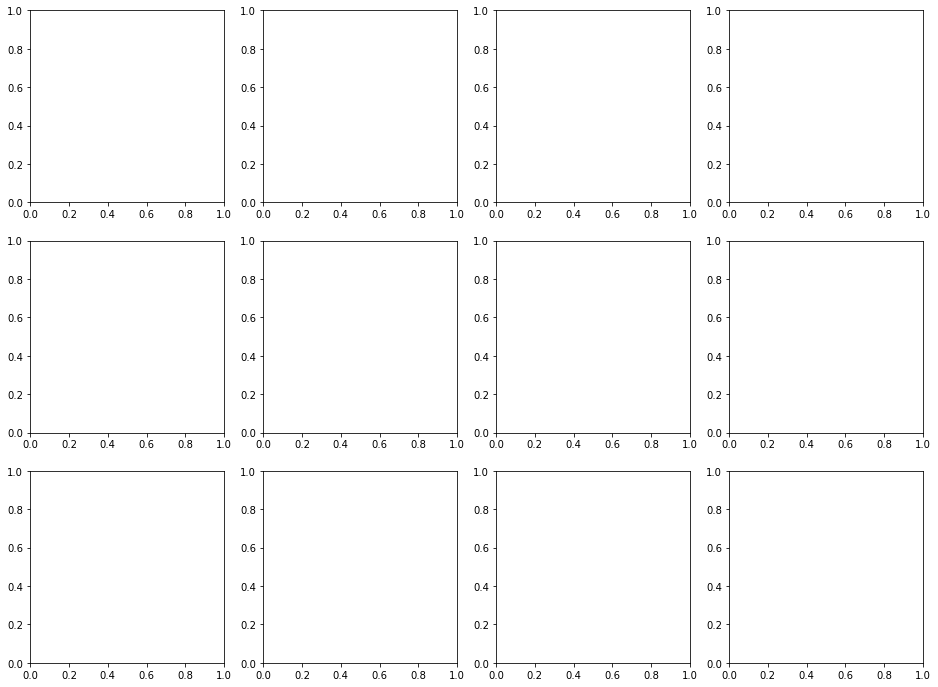

In [43]:
_, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):
    row, col = i/4, i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

- feature별 R squared value

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
# CRIM
y = df.CRIM.values.reshape(-1,1)
X = boston.target
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 30.3 34.6 34.9 32.9 24.1 42.3 48.5 50.  22.6 24.4 22.5 24.4 20.
 21.7 19.3 22.4 28.1 23.7 25.  23.3 28.7 21.5 23.  26.7 21.7 27.5 30.1
 44.8 50.  37.6 31.6 46.7 31.5 24.3 31.7 41.7 48.3 29.  24.  25.1 31.5
 23.7 23.3 22.  20.1 22.2 23.7 17.6 18.5 24.3 20.5 24.5 26.2 24.4 24.8
 29.6 42.8 21.9 20.9 44.  50.  36.  30.1 33.8 43.1 48.8 31.  36.5 22.8
 30.7 50.  43.5 20.7 21.1 25.2 24.4 35.2 32.4 32.  33.2 33.1 29.1 35.1
 45.4 35.4 46.  50.  32.2 22.  20.1 23.2 22.3 24.8 28.5 37.3 27.9 23.9
 21.7 28.6 27.1 20.3 22.5 29.  24.8 22.  26.4 33.1 36.1 28.4 33.4 28.2
 22.8 20.3 16.1 22.1 19.4 21.6 23.8 16.2 17.8 19.8 23.1 21.  23.8 23.1
 20.4 18.5 25.  24.6 23.  22.2 19.3 22.6 19.8 17.1 19.4 22.2 20.7 21.1
 19.5 18.5 20.6 19.  18.7 32.7 16.5 23.9 31.2 17.5 17.2 23.1 24.5 26.6
 22.9 24.1 18.6 30.1 18.2 20.6 17.8 21.7 22.7 22.6 25.  19.9 20.8 16.8
 21.9 27.5 21.9 23.1 50.  50.  50.  50.  50.  13.8 13.8 15.  13.9 13.3
 13.1 10.2 10.4 10.9 11.3 12.3  8.8  7.2 10.5  7.4 10.2 11.5 15.1 23.2
  9.7 13.8 12.7 13.1 12.5  8.5  5.   6.3  5.6  7.2 12.1  8.3  8.5  5.
 11.9 27.9 17.2 27.5 15.  17.2 17.9 16.3  7.   7.2  7.5 10.4  8.8  8.4
 16.7 14.2 20.8 13.4 11.7  8.3 10.2 10.9 11.   9.5 14.5 14.1 16.1 14.3
 11.7 13.4  9.6  8.7  8.4 12.8 10.5 17.1 18.4 15.4 10.8 11.8 14.9 12.6
 14.1 13.  13.4 15.2 16.1 17.8 14.9 14.1 12.7 13.5 14.9 20.  16.4 17.7
 19.5 20.2 21.4 19.9 19.  19.1 19.1 20.1 19.9 19.6 23.2 29.8 13.8 13.3
 16.7 12.  14.6 21.4 23.  23.7 25.  21.8 20.6 21.2 19.1 20.6 15.2  7.
  8.1 13.6 20.1 21.8 24.5 23.1 19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9
 22.  11.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
y = boston.target
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X,y)
    score = lr.score(X,y)
    print(f'{feature}:\t{score:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


- 다중 선형회귀

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2021
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 다중 선형회귀에서는 R squared value가 무의미(score로 좋고 나쁨을 보여주기 어렵)
lr.score(X_test, y_test)

0.6948217410258365

In [ ]:
# Weight
lr.coef_

array([-1.10500227e-01,  5.26278094e-02,  9.51758224e-03,  3.13787206e+00,
       -1.80816721e+01,  3.76906339e+00,  9.62954788e-03, -1.47634409e+00,
        3.19031892e-01, -1.19276281e-02, -8.98574354e-01,  9.05059107e-03,
       -5.53828184e-01])

In [ ]:
# Bias
lr.intercept_

35.503661681753684

- 회귀식
<br>
PRICE = -0.11 * CRIM + 0.053 * ZN + ... - 0.55 * LSTAT + 35.5

- 테스트 데이터

In [ ]:
X_test[0], y_test[0] 

(array([1.7446e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
        5.9600e+00, 9.2100e+01, 3.8771e+00, 4.0000e+00, 2.7700e+02,
        1.8600e+01, 3.9325e+02, 1.7270e+01]),
 21.7)

In [ ]:
# Weight와 Bias로 구한 예측값
np.dot(X_test[0], lr.coef_) + lr.intercept_

22.760898673619927

In [ ]:
# predict로 예측한 값
lr.predict(X_test[:1])

array([22.76089867])

In [ ]:
# 10개의 데이터에 대한 예측값 실제값
for i in range(10):
    pred1 = np.dot(X_test[i], lr.coef_) + lr.intercept_
    # pred2 = lr.predict(X_test[i].reshape(1,-1))
    pred2 = lr.predict([X_test[i]])
    # pred2 = lr.predict[X_test[i:i+1]]
    print(f'실제값: {y_test[i]}, 예측값1: {pred1:.2f}, 예측값2: {pred2[0]:.2f}')

실제값: 21.7, 예측값1: 22.76, 예측값2: 22.76
실제값: 15.6, 예측값1: 15.79, 예측값2: 15.79
실제값: 20.0, 예측값1: 22.26, 예측값2: 22.26
실제값: 12.8, 예측값1: 13.17, 예측값2: 13.17
실제값: 50.0, 예측값1: 36.79, 예측값2: 36.79
실제값: 20.6, 예측값1: 19.43, 예측값2: 19.43
실제값: 22.6, 예측값1: 27.04, 예측값2: 27.04
실제값: 24.1, 예측값1: 29.42, 예측값2: 29.42
실제값: 24.4, 예측값1: 23.64, 예측값2: 23.64
실제값: 36.1, 예측값1: 33.23, 예측값2: 33.23
